# Exploratery Data Analysis

## Sibt ul Hussain

There are enumerous useful visualization techniques that are useful for exploratory data analysis: In practice, the choice highly depends on the kind of data and the question at hand. 

This IPython notebook is a small gallery for visualizing the Iris flower dataset. This gallery is more meant to be a code matplotlib reference so that certain plots may be more or less useful in the context of this dataset. 

## Reading in the dataset

[[back to top](#Sections)]

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns

In [5]:
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print (data.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [22]:
# convert pandas DataFrame to simple numpy arrays
X = data[data.columns].values
Y = data['Class'].values
labels = {}
for i,v in enumerate(np.unique(Y)):
    labels[v] = i
    Y[Y==v] = i
Y= Y.astype(np.int8)
print (data.count()[0])

149


## Pie chart

Plot the distribution of classes as pie chart. See the documentation for details of pie plot.

In [23]:
data['Class'].unique()

array([0, 1, 2], dtype=object)

SepalLength
49


([<matplotlib.patches.Wedge at 0x7fcb21fae7c0>,
 [Text(0.5633356885593999, 0.9448031022362844, 'Iris-setosa'),
  Text(-1.099755503996816, 0.02319119291259364, 'Iris-versicolor'),
  Text(0.5432913741717657, -0.9564698023202586, 'Iris-virginica')])

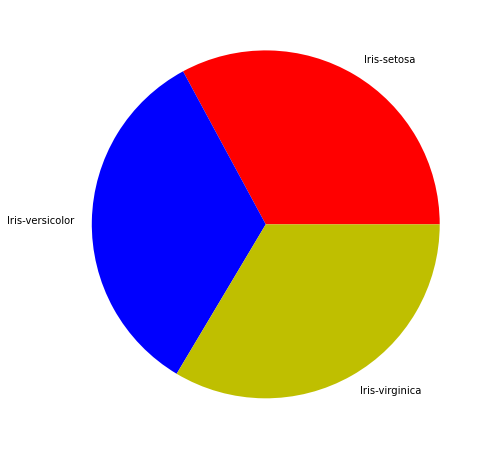

In [24]:
fig,ax=plt.subplots()
C1=data[data['Class']==0]
C2=data[data['Class']==1]
C3=data[data['Class']==2]
print (C1.columns[0])
print (C1.count()[0])
ax.pie([C1.count()[0],C2.count()[0],C3.count()[0]],labels=["Iris-setosa","Iris-versicolor","Iris-virginica"],colors=["r",'b','y'])

## Bar plot

In [25]:
C1.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class'], dtype='object')

[0 3 6 9]


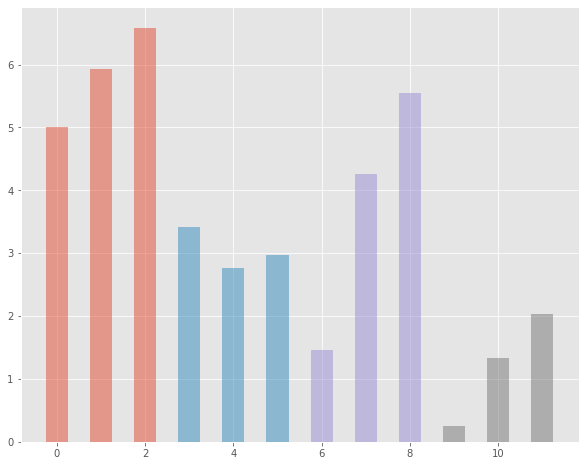

In [26]:
fig2,axes2=plt.subplots()
labels=C1.columns
j=0
print (np.arange(0,12,3))
for i in np.arange(0,12,3):
    axes2.bar([i,i+1,i+2],[C1[labels[j]].mean(),C2[labels[j]].mean(),C3[labels[j]].mean()],align="center", width=0.5, alpha=0.5)
    j+=1


## 1D Histogram

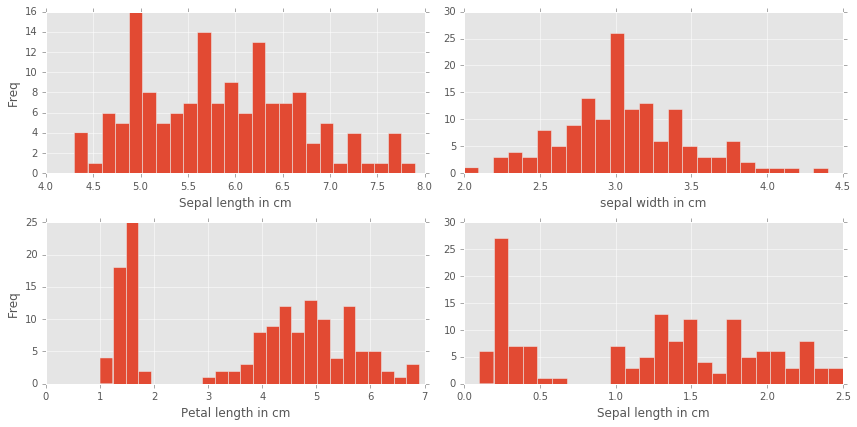

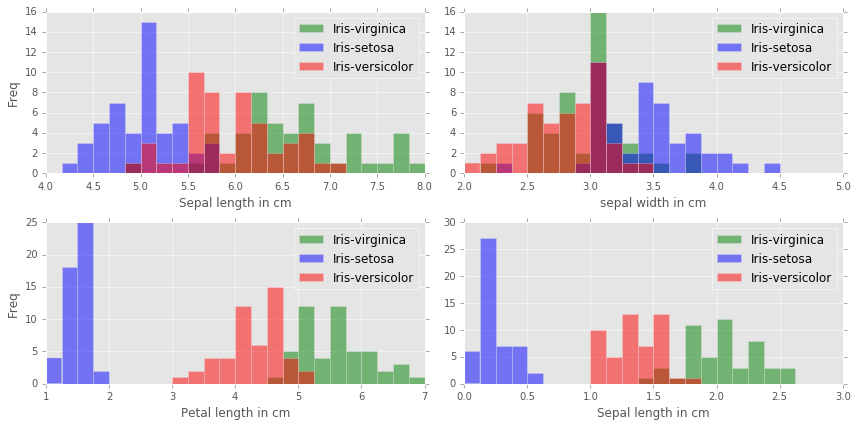

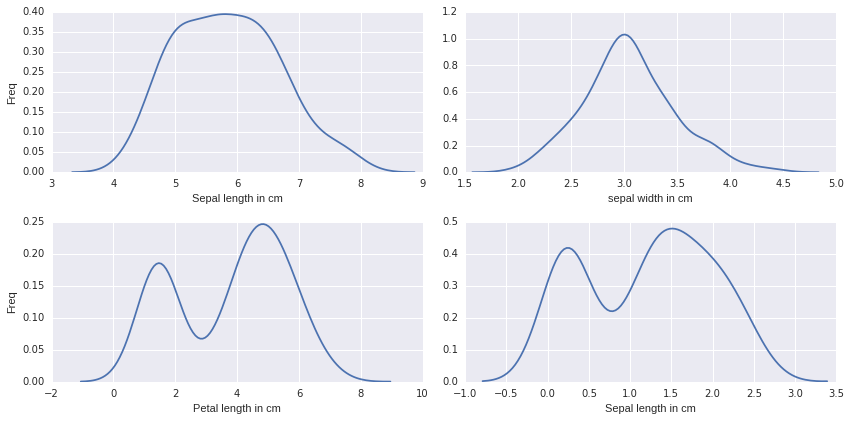

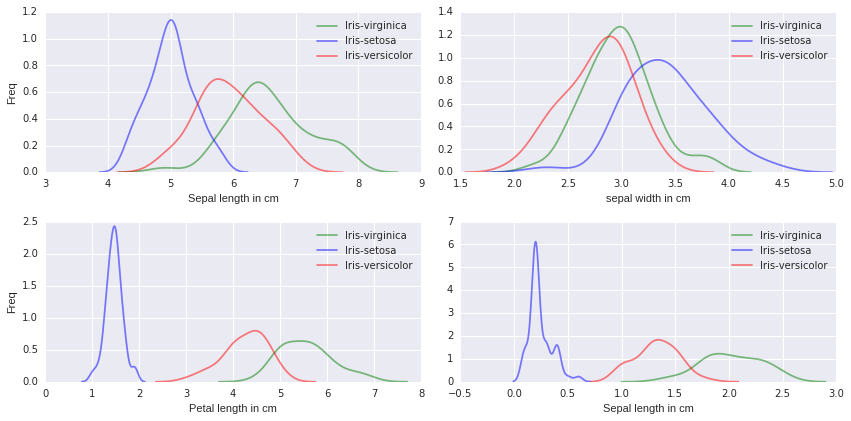

## Scatter plot

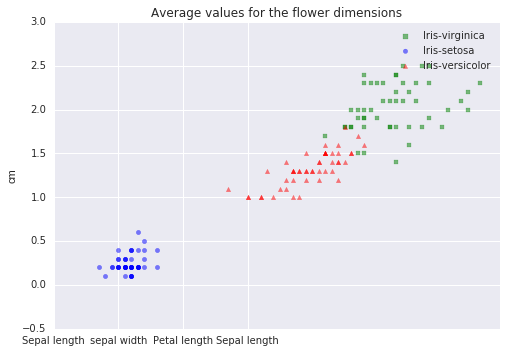

## 3D Scatter plot

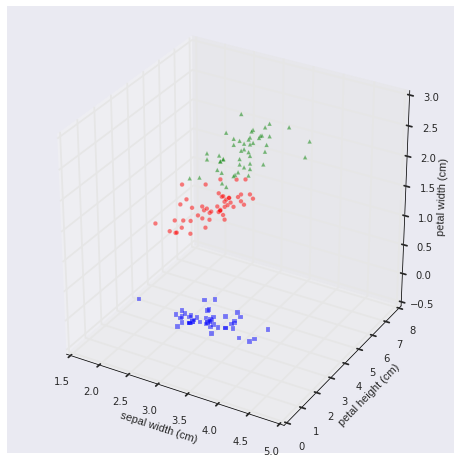

# More than two variables

In [27]:
data.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class'], dtype='object')

/home/troon/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


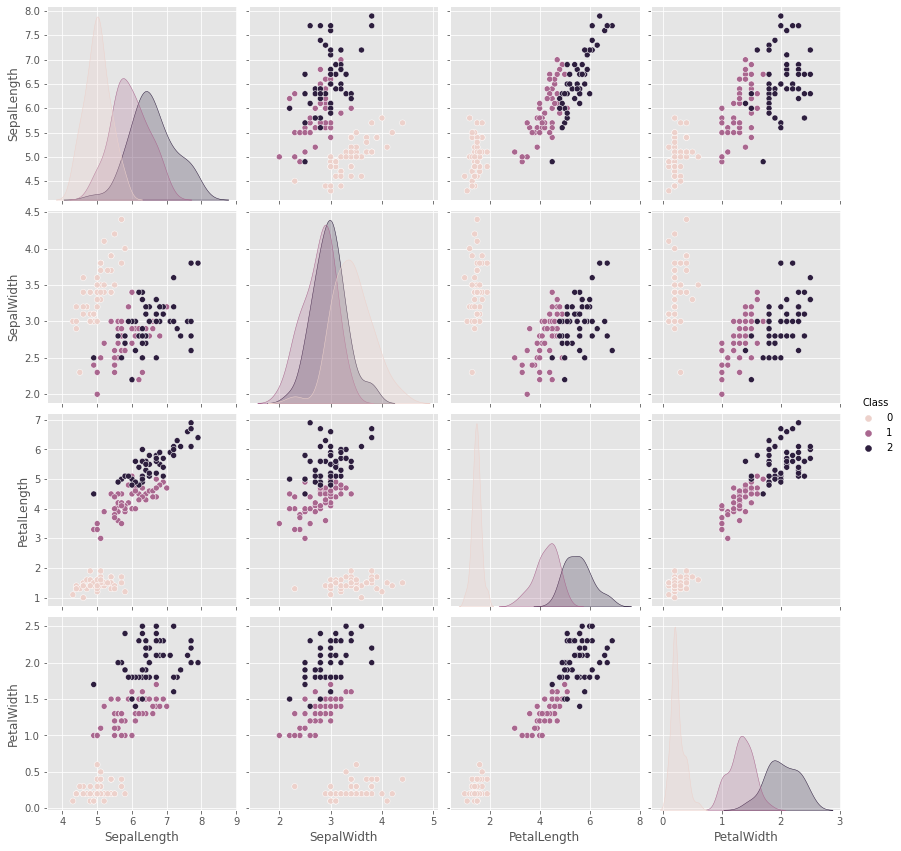

In [28]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(data, hue="Class", size=3)

/home/troon/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


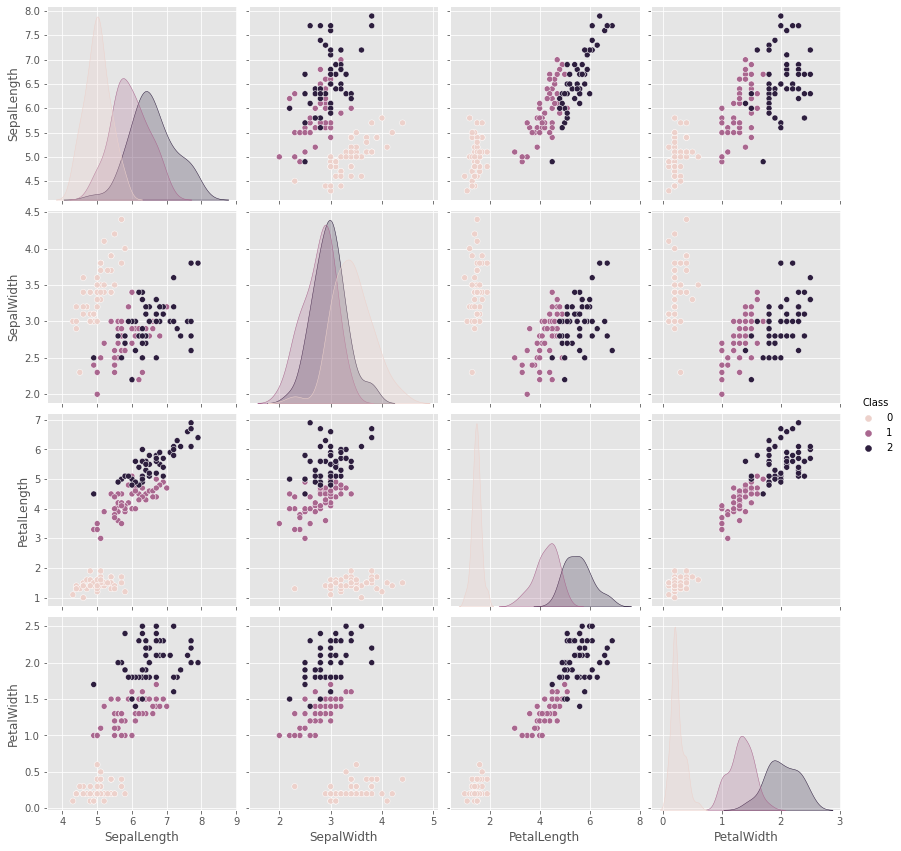

In [29]:
sns.pairplot(data, hue="Class", size=3, diag_kind="kde")

array([[<AxesSubplot:title={'center':'PetalLength'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'PetalWidth'}, xlabel='[Class]'>],
       [<AxesSubplot:title={'center':'SepalLength'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'SepalWidth'}, xlabel='[Class]'>]],
      dtype=object)

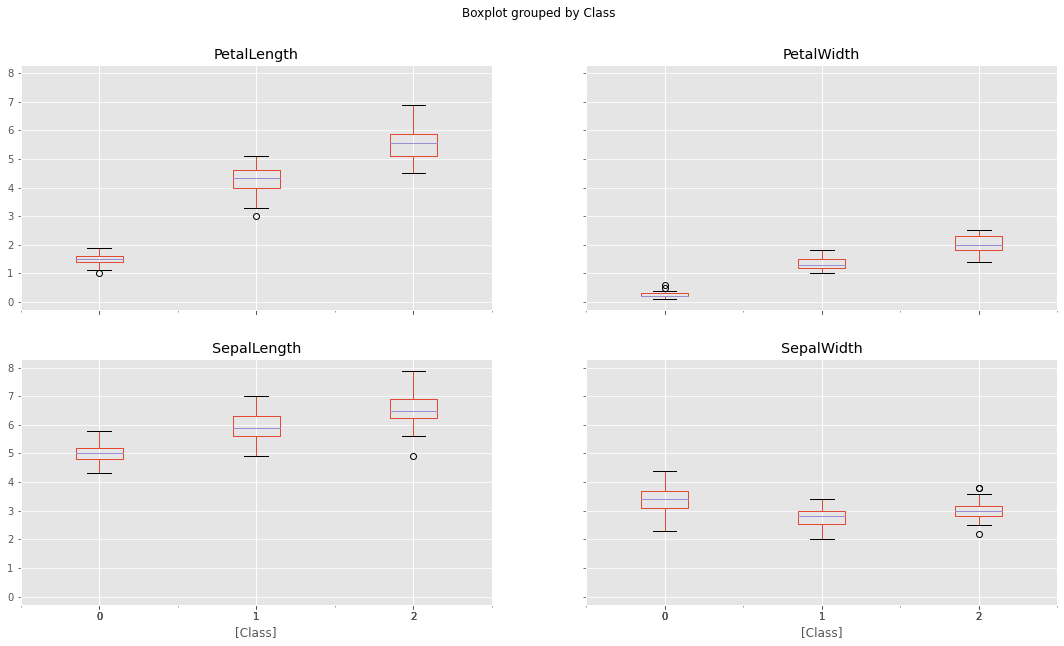

In [30]:
# We can quickly make a boxplot with Pandas on each feature split out by species
data.boxplot(by="Class", figsize=(18,10))

In [31]:
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']

([<matplotlib.axis.XTick at 0x7fcb1a575eb0>,
 [Text(1, 0, 'SepalLength'),
  Text(2, 0, 'SepalWidth'),
  Text(3, 0, 'PetalWidth'),
  Text(4, 0, 'PetalLength')])

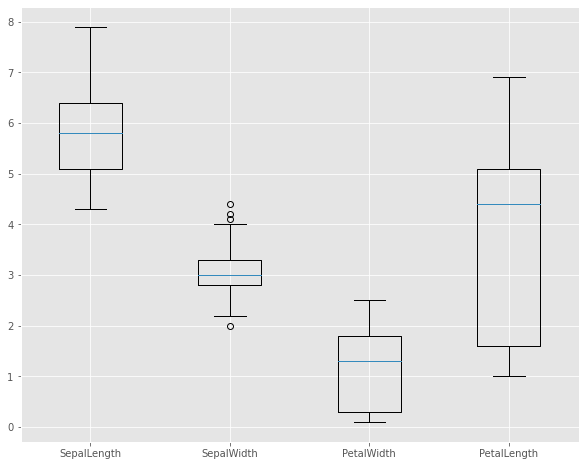

In [32]:
#flier_high = q3+1.5* interquartile-range
# flier_low = q1-1.5* interquartile-range
# mid-point=median

# basic plot
pdata=data[['SepalLength','SepalWidth','PetalWidth','PetalLength']].dropna()
plt.boxplot(np.asarray(pdata))
# plt.set_xlabel()
pylab.xticks([1, 2, 3,4],['SepalLength','SepalWidth','PetalWidth','PetalLength'])

In [33]:
def boxPlotByClass(data,axes,classlabel):
    #Plots a box plot arranged by class...
    idx=data['Class']==classlabel
    pdata=data[idx][['SepalLength','SepalWidth','PetalWidth','PetalLength']].dropna();
    axes.boxplot(np.asarray(pdata))
# plt.set_xlabel()
    axes.set_xticklabels(['SLength','SWidth','PWidth','PLength'])
    axes.set_title('Class={}'.format(classlabel))

### Plot the box-plot class wise as well... i,e.

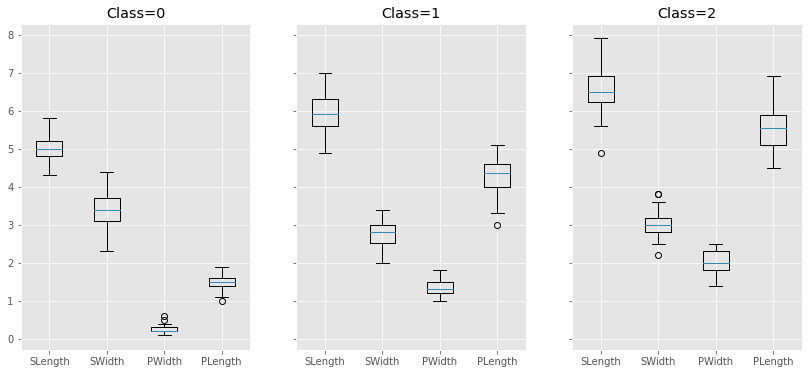

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(14,6),squeeze=False,sharey=True,)

classes=np.unique(data['Class'].dropna())

boxPlotByClass(data,axes[0,0],classes[0])
boxPlotByClass(data,axes[0,1],classes[1])
boxPlotByClass(data,axes[0,2],classes[2])

#### You can also boxplot each feature categorized by the classes...

In [35]:
def boxPlotByFeature(data,axes,xlabel):
    #Plots a box plot for a given feature by class...
    classes=np.unique(data['Class'].dropna())
    legends=[c for c in classes]
    x=data[data['Class']==classes[0]][xlabel].dropna();
    y=data[data['Class']==classes[1]][xlabel].dropna();
    z=data[data['Class']==classes[2]][xlabel].dropna();
    t=[]
    t.append(list(x))
    t.append(list(y))
    t.append(list(z))
    axes.boxplot(t)
    axes.set_xticklabels(legends)
    axes.set_title('Feature={}'.format(xlabel))

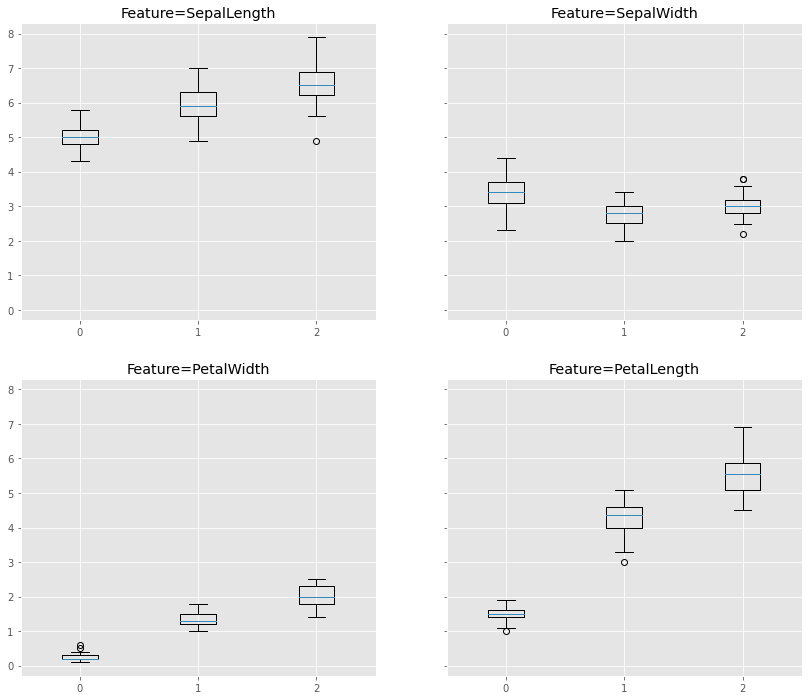

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14,12),squeeze=False,sharey=True,)

features=['SepalLength','SepalWidth','PetalWidth','PetalLength']

boxPlotByFeature(data,axes[0,0],features[0])
boxPlotByFeature(data,axes[0,1],features[1])
boxPlotByFeature(data,axes[1,0],features[2])
boxPlotByFeature(data,axes[1,1],features[3])

## Q-Q Plot

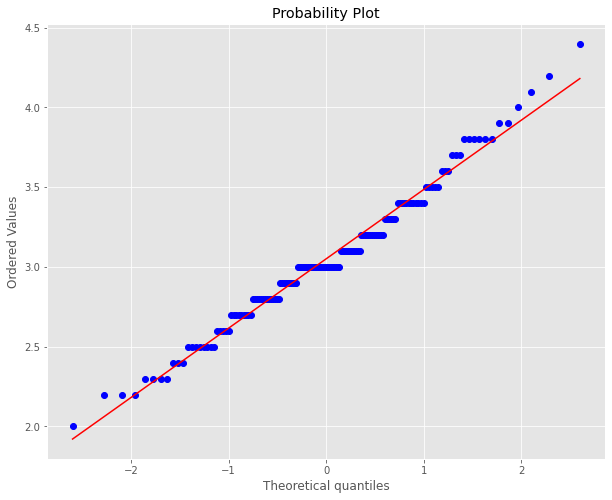

In [37]:
import scipy.stats as stats
stats.probplot(data['SepalWidth'], dist="norm", plot=plt)
plt.show()